# Image segmentation

Based on: https://scikit-image.org/skimage-tutorials/lectures/4_segmentation.html

[Recap how we saw it before]

[Terminator image from skimage lectures]

## Otsu method - great if it works

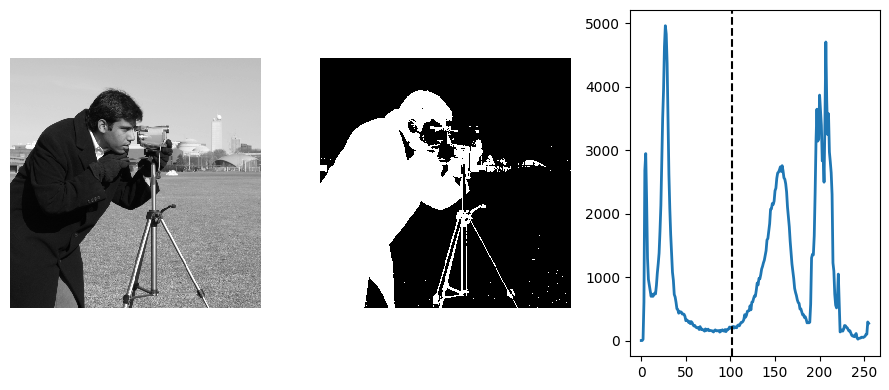

In [1]:
import matplotlib.pyplot as plt
import skimage as ski
from skimage import data
from skimage import filters
from skimage import exposure

camera = data.camera()
val = filters.threshold_otsu(camera)

hist, bins_center = exposure.histogram(camera)

plt.figure(figsize=(9, 4))
plt.subplot(131)
plt.imshow(camera, cmap="gray", interpolation="nearest")
plt.axis("off")
plt.subplot(132)
plt.imshow(camera < val, cmap="gray", interpolation="nearest")
plt.axis("off")
plt.subplot(133)
plt.plot(bins_center, hist, lw=2)
plt.axvline(val, color="k", ls="--")

plt.tight_layout()
plt.show()

# Labelling connected components

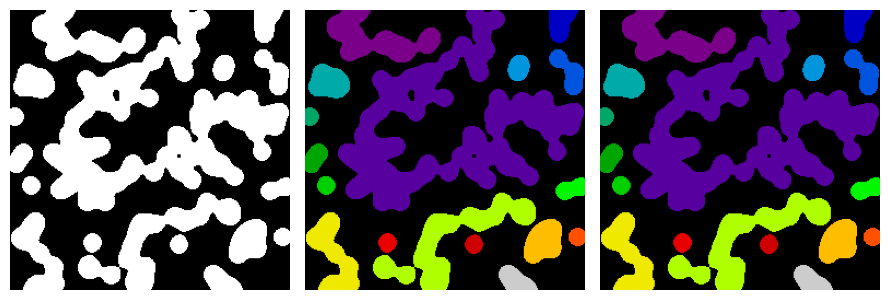

In [2]:
from skimage import measure
from skimage import filters
import matplotlib.pyplot as plt
import numpy as np

n = 12
l = 256
rng = np.random.default_rng(27446968)
im = np.zeros((l, l))
points = l * rng.random((2, n**2))
im[(points[0]).astype(int), (points[1]).astype(int)] = 1
im = filters.gaussian(im, sigma=l / (4.0 * n))
blobs = im > 0.7 * im.mean()

all_labels = measure.label(blobs)
blobs_labels = measure.label(blobs, background=0)

plt.figure(figsize=(9, 3.5))
plt.subplot(131)
plt.imshow(blobs, cmap="gray")
plt.axis("off")
plt.subplot(132)
plt.imshow(all_labels, cmap="nipy_spectral")
plt.axis("off")
plt.subplot(133)
plt.imshow(blobs_labels, cmap="nipy_spectral")
plt.axis("off")

plt.tight_layout()
plt.show()

# Marker based methods

# Watershed and random walker segementation

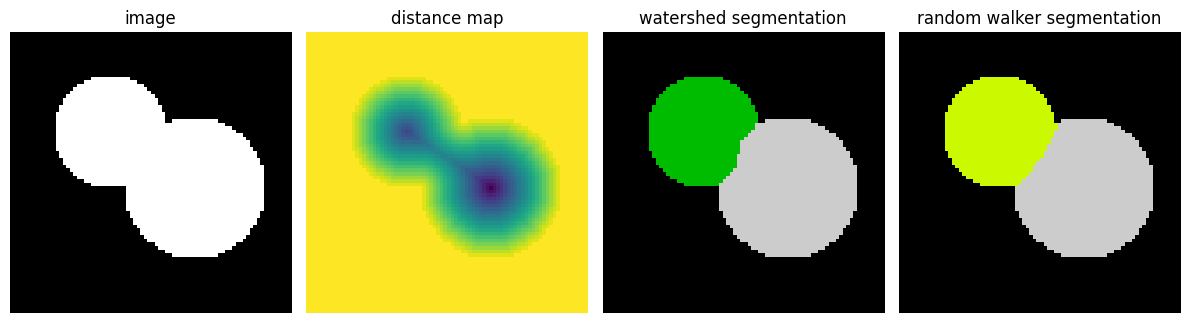

In [3]:
import numpy as np
from skimage.segmentation import watershed
from skimage.feature import peak_local_max
from skimage import measure
from skimage.segmentation import random_walker
import matplotlib.pyplot as plt
import scipy as sp

# Generate an initial image with two overlapping circles
x, y = np.indices((80, 80))
x1, y1, x2, y2 = 28, 28, 44, 52
r1, r2 = 16, 20
mask_circle1 = (x - x1) ** 2 + (y - y1) ** 2 < r1**2
mask_circle2 = (x - x2) ** 2 + (y - y2) ** 2 < r2**2
image = np.logical_or(mask_circle1, mask_circle2)
# Now we want to separate the two objects in image
# Generate the markers as local maxima of the distance
# to the background
distance = sp.ndimage.distance_transform_edt(image)
peak_idx = peak_local_max(distance, footprint=np.ones((3, 3)), labels=image)
peak_mask = np.zeros_like(distance, dtype=bool)
peak_mask[tuple(peak_idx.T)] = True
markers = measure.label(peak_mask)
labels_ws = watershed(-distance, markers, mask=image)

markers[~image] = -1
labels_rw = random_walker(image, markers)

plt.figure(figsize=(12, 3.5))
plt.subplot(141)
plt.imshow(image, cmap="gray", interpolation="nearest")
plt.axis("off")
plt.title("image")
plt.subplot(142)
plt.imshow(-distance, interpolation="nearest")
plt.axis("off")
plt.title("distance map")
plt.subplot(143)
plt.imshow(labels_ws, cmap="nipy_spectral", interpolation="nearest")
plt.axis("off")
plt.title("watershed segmentation")
plt.subplot(144)
plt.imshow(labels_rw, cmap="nipy_spectral", interpolation="nearest")
plt.axis("off")
plt.title("random walker segmentation")

plt.tight_layout()
plt.show()